# STAT 207 Lab 9: Linear Regression - [25 total points] - Solutions

Due: Wednesday, April 7 11:59pm CST



## <u>Case Study </u>: Weekend Smoking Habits of U.K. Smokers
We are interested in learning more about the relationship between how many cigarettes U.K. smokers smoke on the weekends and the following additional factors:
* the amount they smoke the weekdays
* age
* marital status
* sex.

Specifically, we would like to see if these variables can predict the amount that U.K. smokers smoke on the weekends.

The smoking.csv dataset contains a random sample of 421 U.K. smokers.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Read in the smoking.csv into a dataframe.

In [9]:
df = pd.read_csv("smoking.csv")
df2 = df[["amt_weekends","amt_weekdays"]]

### 1. [1.5 pt] Visualize the relationship between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays. 

### Then, use this plot to describe the relationship. Remember there are four things you should be ready to discuss.


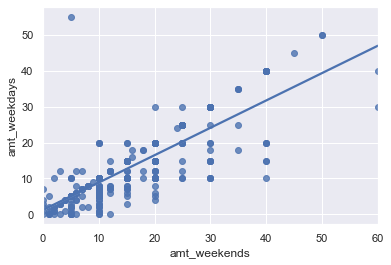

In [10]:
sns.regplot(x="amt_weekends",y="amt_weekdays",data=df2,ci=False)
plt.show()

1.The direction is positive (up to right)
2.The shape is linear
3.The strength is strong 
4.There is the outlier in the data. A point falls far away from the main cloud of data.

### 2. [1 pt] Calculate the correlation between the amount that the smokers in the dataset smoke on the weekend vs. smoke on the weekdays and interpret it.

In [12]:
cov = df2.cov().iloc[0,1]
cov

74.49320778192512

In [13]:
rxy = df2.corr().iloc[0,1]
rxy

0.8020521245005168

0.802 is positive, so the relationship is positive
0.802 represents a strong relationship

### 3. [0.5 pt]  Can you use this correlation to describe the strength of the relationship between the amount smoked on the weekdays and the weekend. Why or why not?

Yes, the relationship between two variables is linear.

### 4. [1 pt]  In one figure (a figure can have multiple plots), visualize the relationship between the amount smoked on the weekdays and the weekends for every combination of sex and marital status. Plot a best fit line for each of these combinations (also in the same figure.

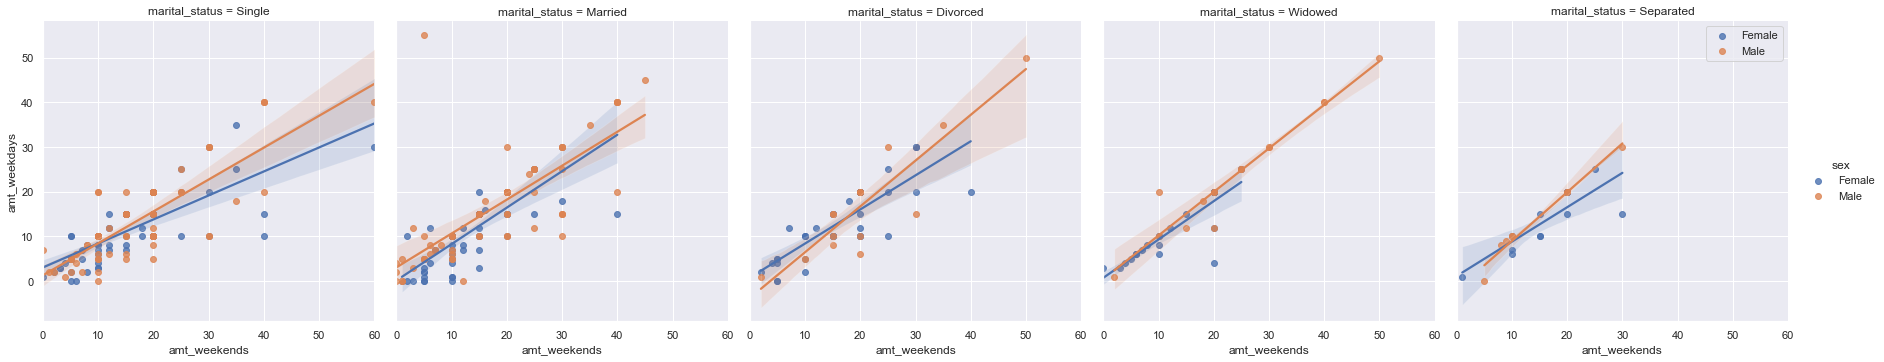

In [15]:
sns.lmplot(x="amt_weekends",y='amt_weekdays', hue='sex', col='marital_status', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### 5. [1 pt]  Out of the 10 combinations of sex and marital status given in the data, which has the strongest linear association between the amount smoked on the weekdays and the amount smoked on the weekend. Which one had the weakest?

In [16]:
df.groupby(['sex','marital_status']).corr()

age  amt_weekends  amt_weekdays
sex    marital_status                                                   
Female Divorced       age           1.000000      0.033771      0.027449
                      amt_weekends  0.033771      1.000000      0.825356
                      amt_weekdays  0.027449      0.825356      1.000000
       Married        age           1.000000      0.192906      0.270235
                      amt_weekends  0.192906      1.000000      0.805186
                      amt_weekdays  0.270235      0.805186      1.000000
       Separated      age           1.000000     -0.184835     -0.238553
                      amt_weekends -0.184835      1.000000      0.825585
                      amt_weekdays -0.238553      0.825585      1.000000
       Single         age           1.000000      0.087175      0.183180
                      amt_weekends  0.087175      1.000000      0.757588
                      amt_weekdays  0.183180      0.757588      1.000000
       Widowed        age           1.000000     -0.417753     -0.226351
                      amt_weekends -0.417753      1.000000      0.878221
                      amt_weekdays -0.226351      0.878221      1.000000
Male   Divorced       age           1.000000     -0.323897     -0.341073
                      amt_weekends -0.323897      1.000000      0.891828
                      amt_weekdays -0.341073      0.891828      1.000000
       Married        age           1.000000     -0.012128      0.126175
                      amt_weekends -0.012128      1.000000      0.741600
                      amt_weekdays  0.126175      0.741600      1.000000
       Separated      age           1.000000      0.303021      0.409740
                      amt_weekends  0.303021      1.000000      0.985361
                      amt_weekdays  0.409740      0.985361      1.000000
       Single         age           1.000000      0.164906      0.309638
                      amt_weekends  0.164906      1.000000      0.804401
                      amt_weekdays  0.309638      0.804401      1.000000
       Widowed        age           1.000000      0.273159      0.146958
                      amt_weekends  0.273159      1.000000      0.962760
                      amt_weekdays  0.146958      0.962760      1.000000

Separated males had the strongest correlation (0.985) and married males had the weakest correlation (0.742).

### 6. [2 pt]  Next, fit a linear regression model which has a response variable of the amount smoked on the weekend and the following explanatory variables:
* amount smoked on the weekdays
* sex
* age
* marital status

### Write out your multiple linear regression model equation.

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
final_mod = smf.ols('amt_weekends~amt_weekdays+sex+age+marital_status', 
               data=df).fit()
final_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           amt_weekends   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     112.2
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           2.01e-91
Time:                        05:21:41   Log-Likelihood:                -1337.5
No. Observations:                 421   AIC:                             2691.
Df Residuals:                     413   BIC:                             2723.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.7400      1.450      5.340      0.000       4.891      10.589
sex[T.Male]                    -0.0387      0.600     -0.065      0.948      -1.217       1.140
marital_status[T.Married]      -1.3727      0.922     -1.488      0.137      -3.186       0.440
marital_status[T.Separated]    -1.6299      1.473     -1.107      0.269      -4.525       1.265
marital_status[T.Single]       -0.6161      1.012     -0.609      0.543      -2.606       1.373
marital_status[T.Widowed]      -1.0180      1.327     -0.767      0.443      -3.626       1.590
amt_weekdays                    0.8655      0.032     27.290      0.000       0.803       0.928
age                            -0.0546      0.026     -2.135      0.033      -0.105      -0.004
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2454.460
Skew:                           0.240   Prob(JB):                         0.00
Kurtosis:                      14.819   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model:
Y = 7.7400 + -0.0387sex[T.Male] + -1.3727marital_status[T.Married] + -1.6299marital_status[T.Separated] + -0.6161marital_status[T.Single]	+ 	-1.0180marital_status[T.Widowed]+ 0.8655amt_weekdays+ 	-0.0546age

### 7. [1 pt]  By hand, predict the amount of weekend cigarettes that are smoked by a 42 year old, single, female who smokes 12 cigarettes on the weekdays.

In [20]:
y = 7.7400 + (-0.6161) + (0.8655*12) +(-0.0546*42)
y

15.216700000000001

### 8. [1 pt]  Using Python functions, predict the amount of weekend cigarettes that are smoked by a 42 year old single female who smokes 12 cigarettes on the weekdays.

(See the last part of the Unit 13 notebook for help.)

In [19]:
final_mod.predict(exog=dict(amt_weekdays=12, sex='Female', age=42, marital_status="Single"))

0    15.215399
dtype: float64

### 9 [0.5 pt] The first observation in the dataframe represents this smoker from the previous problem. What is the residual for this prediction we just calculated?

In [29]:
final_mod.resid[15]

5.313864768795231

### 10. [1 pt]  What percent of the variability of the amount of cigarettes smoked by this sample on the weekends is explained by the model?

In [21]:
final_mod.rsquared

0.6552925583740852

### 11. [5 pt]  Check the five conditions for conducting inference on the population intercept and slopes associated with this model. Discuss whether each condition is or is not met.

Linearity Condition:
Because the distribution of points in the plot below are not evenly distributed above and below the line as we move from left to right, we can say the linearity condition is not met.

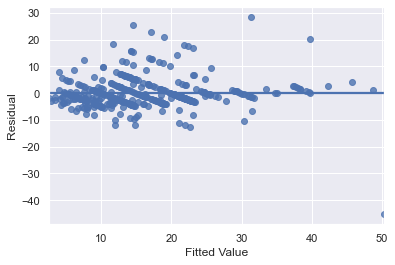

In [26]:
sns.regplot(x=final_mod.fittedvalues, y=final_mod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Constant Variability of Residuals Condition:
Because the y-axis spread of points in the plot below slightly change as we move from left to right, we can say that this condition is slightly not met.

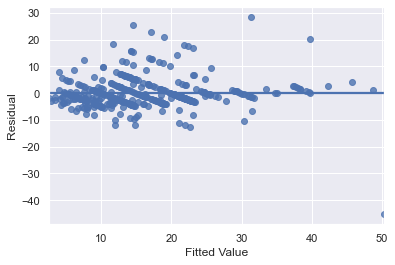

In [30]:
sns.regplot(x=final_mod.fittedvalues, y=final_mod.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Normality of Residuals (with Mean of 0) Condition:
Because the histogram of residuals is slightly skewed to the left, the assumption that the residuals are normally distributed is slightly not met. (However, it does look like the mean is about 0).

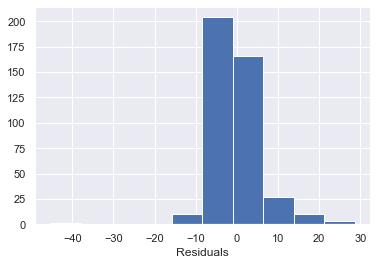

In [31]:
plt.hist(final_mod.resid)
plt.xlabel('Residuals')
plt.show()

Independence of Residuals Condition
At the very least, we verify that:

the data is randomly sampled and
the sample size n=421<10% of all smokers
Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent

No Multicollinearity Condition

Let's take a look at the relationships between each pair of numerical explanatory variables. 

We see that there is a weak non-linear relationship (R=0.192783) between the explanatory variables height and elbow_diameter. Thus the multicollinearity condition is met.


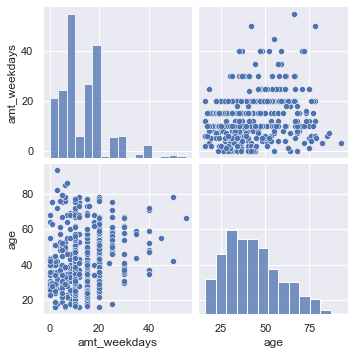

In [33]:
sns.pairplot(df[['amt_weekdays','age']])
plt.show()

In [34]:
df[['amt_weekdays','age']].corr()

,amt_weekdays,age
amt_weekdays,1.000000,0.192783
age,0.192783,1.000000


### 12.  Next, we would like to test whether there is sufficient evidence to suggest that the age slope in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 12.1. [1 pt]  Formulate the hypotheses for this test.

Null hypothesis: p = 0
Alternative hypothesis: p != 0
(p is the population slope corresponding to the age)

#### 12.2 [2 pt]  Calculate a 90% confidence interval for this slope.

In [35]:
point_estimate=-0.0546
print('Point Estimate = Sample Slope = ', point_estimate)

Point Estimate = Sample Slope =  -0.0546


In [37]:
standard_error=0.026
print('Standard Error', standard_error)

Standard Error 0.026


In [38]:
from scipy.stats import t

critical_value=t.ppf(0.95, df=413)
print('Critical Value:', critical_value)

Critical Value: 1.6485514808617563


In [40]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval for the Age Population Slope in the Model:', lower_bound,upper_bound)

90% Confidence Interval for the Age Population Slope in the Model: -0.09746233850240565 -0.011737661497594344


#### 12.3 [0.5 pt]  Make a conclusion about your hypotheses using this confidence interval.

We are 90% confident that the age slope in the multiple linear regression population model (that predicts the amount smoked on the weekend of all UK smokers with sex, age , merital status and amount smoked on the weekdays) is between -0.097 and -0.0117.

#### 12.4 [0.5 pt]  Calculate the test statistic for this test by hand. Verify this test statistic in your regression output table.

In [46]:
test = (-0.0546-0)/0.026
test

-2.1

#### 12.5 [1 pt]  Use this test statistic to calculate the p-value for this hypothesis test (using the distribution that this test statistic is an observation from). Verify this p-value in your regression output table.

In [48]:
from scipy.stats import t

pvalue=2*(1-t.cdf(np.abs(test), df=413))
print('p-value', pvalue)

p-value 0.036334878049917974


0.036

#### 12.6 [0.5 pt]  Use this p-value to make a conclusion about your hypotheses, using a significance level of $\alpha=0.10$.

Because  𝑝−𝑣𝑎𝑙𝑢𝑒<𝛼=0.10 , we reject the null hypothesis. Thus we have sufficient evidence to suggest that the age slope p  in the multiple linear regression population model (the amount smoked on the weekend of all UK smokers with sex, age , merital status and amount smoked on the weekdays) is non-zero.

#### 12.7 [1 pt]  What is the probability that the population slope for age was *actually* equal to zero in the previous test and that we incorrectly rejected it in our test?

10%

### 13. Next, we would like to test whether there is sufficient evidence to suggest that at least one of the population slopes in the corresponding population model (ie. considering ALL U.K. smokers) is non-zero.

#### 13.1 [1 pt]  Formulate the hypotheses for this test.

Null hypothesis: P1 = P2 = P3 = P4 = P5 = P6 = P7 = 0
Alternative hypothesis: at least one Pi != 0 (i = 1,2,3,4,5,6,7)
P is the population slope in the corresponding population model

#### 13.2 [0.5 pt]  What is the test statistic for this hypothesis test?

In [50]:
teststat = 112.2

In [51]:
teststat

112.2

#### 13.3 [1 pt]  Use the distribution that this test statistic is an observation from to calculate the p-value for this test.

1.1102

In [53]:
from scipy.stats import f
slopes = 7 
total = 421 - slopes - 1
pvalue=1-f.cdf(112.2, dfn=slopes,dfd=total)
print('p-value: ',pvalue)

p-value:  1.1102230246251565e-16


#### 13.4 [0.5 pt]  Make a conclusion about your hypotheses using a significance level of $\alpha=0.10$.

Because the  𝑝−𝑣𝑎𝑙𝑢𝑒<0.10 , we reject the null hypothesis. Thus there is suffificient evidence to suggest that at least one of the population slopes in the population model is non-zero.